# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Jayaram Reddy <br>
Roll Number: 2022701006

In [46]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [48]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [49]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [50]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [51]:
dirpath = 'data/IIIT-CFW/'
X,y = load_data(dirpath)
# print(X.shape)
# print(y)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


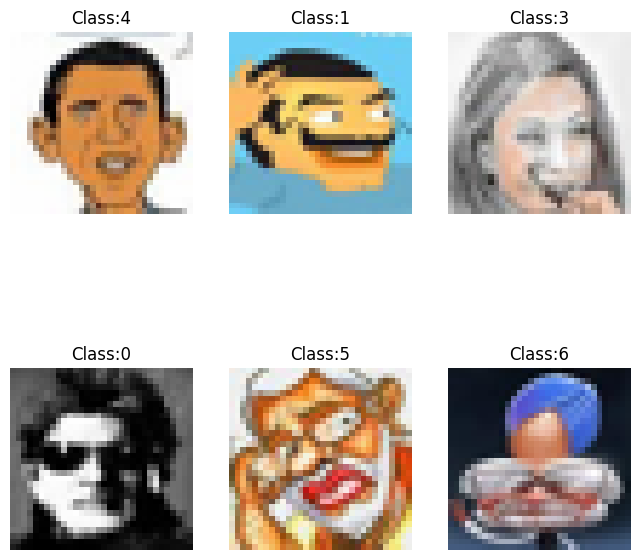

In [52]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
# print(ind)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


Flatten images and construct data matrix

In [53]:
X = X.reshape((N, H * W * C))   #X is data matrix
print('Data Matrix shape: {}'.format(X.shape))

Data Matrix shape: (672, 3072)


#### Write a function that gives eigen values and eigen vectors given data

In [66]:
# write function
def get_eigenvalues_and_eigenvectors(X, y):
    [N, d] = X.shape   #(672, 3072)
    mean = X.mean(axis = 0)
    X = X - mean
    if N > d:   
        cov_matrix = np.dot(X.T, X) 
        [eigenvalues ,eigenvectors] = np.linalg.eigh(cov_matrix)
    else :   
        cov_matrix = np.dot (X, X.T)   #(672, 672)
        [eigenvalues ,eigenvectors] = np.linalg.eigh(cov_matrix)
        # print('eigenvectors dim:{}'.format(eigenvectors.shape))   (672, 672)
        eigenvectors = np.dot(X.T, eigenvectors)
        for i in range (N):
            eigenvectors [:, i] = eigenvectors [:, i]/ np.linalg.norm(eigenvectors [:, i])
        # print('eigenvectors dim:{}'.format(eigenvectors.shape))     (3072, 672)
            
    # sort eigenvectors descending by their eigenvalue
    idx = np.argsort (- eigenvalues )
    #print(idx.shape)  (672,)
    eigenvalues = eigenvalues [idx]
    eigenvectors = eigenvectors [:, idx]
    return [ eigenvalues , eigenvectors] 

[eigenvalues, eigenvectors] = get_eigenvalues_and_eigenvectors(X, y)
eigenvectors = eigenvectors.T
print('eigenvectors dim:{}'.format(eigenvectors.shape))     #(672, 3072)
#each eigenvector dimension is 3072

print(eigenvectors[0])
print(eigenvalues[0])

eigenvectors dim:(672, 3072)
[0.02292623 0.02397955 0.02493145 ... 0.02018243 0.02059623 0.02169246]
54037.090920998475


#### Compute eigen values and plot eigen value spectrum

In [64]:
# eigen values and spectrum
np.set_printoptions(suppress=True)


#### Plot the percentage of variances vs the number of principal components

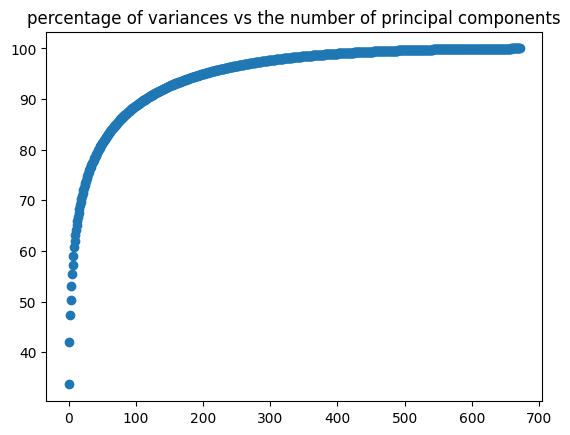

In [65]:
def plot_eigen_value_distribution(eigenvalues, interval):
    plt.scatter(interval, (np.cumsum(eigenvalues) / np.sum(eigenvalues))*100.0)

dim = eigenvectors.shape[0]    #672
plot_eigen_value_distribution(eigenvalues, range(0, dim))
plt.title("percentage of variances vs the number of principal components")
plt.show()

#### Visualize eigen faces(eigen vectors)

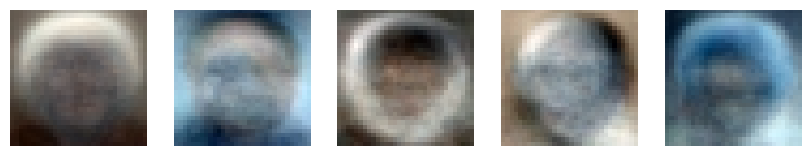

In [58]:

#Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigenvectors,H,W,C, indices)



In [59]:
def get_no_of_eigenvectors_for_given_variance(eigenvalues, variance = .90):
    for ii, eigenvalue_cumulative_sum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigenvalue_cumulative_sum > variance:
            return ii

# plot variance vs components
variance = 0.90
n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
print('no of eigenvectors required to capture {} percent variance :{}'.format(variance*100.0, n_components))

required_eigenvalues = eigenvalues[0: n_components ]
required_eigenvectors = eigenvectors[: ,0: n_components ]

no of eigenvectors required to capture 90.0 percent variance :114


#### Reconstruction 

In [60]:
# reconstruction util functions 
def plot_images(img_set, n_r, n_c, img_titles):
    fig = plt.figure(figsize = (10, 10))
    cnt = 0
    for i in range(n_r):
        for j in range(n_c):
            if cnt == len(img_set):
                break
            ax1 = fig.add_subplot(n_r, n_c, cnt + 1)
            ax1.imshow(img_set[cnt], cmap = 'gray')
            ax1.set_title(img_titles[cnt], fontsize = 15)
            cnt = cnt + 1
    plt.show() 
    
def project (eigenvectors_proj , X , mu):
    #eigenvectors_proj is the set of eigenvectors on which face needs to be projected
    return (eigenvectors_proj @ (X-mu).reshape(-1, 1))

def reconstruct (eigenvectors_proj , P , mu) :
    return (eigenvectors_proj.T @ P).reshape(-1) + mu


#### Plot data in 2D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)
num components required for 90.0 variability: 114
num components required for 95.0 variability: 201
num components required for 99.0 variability: 400


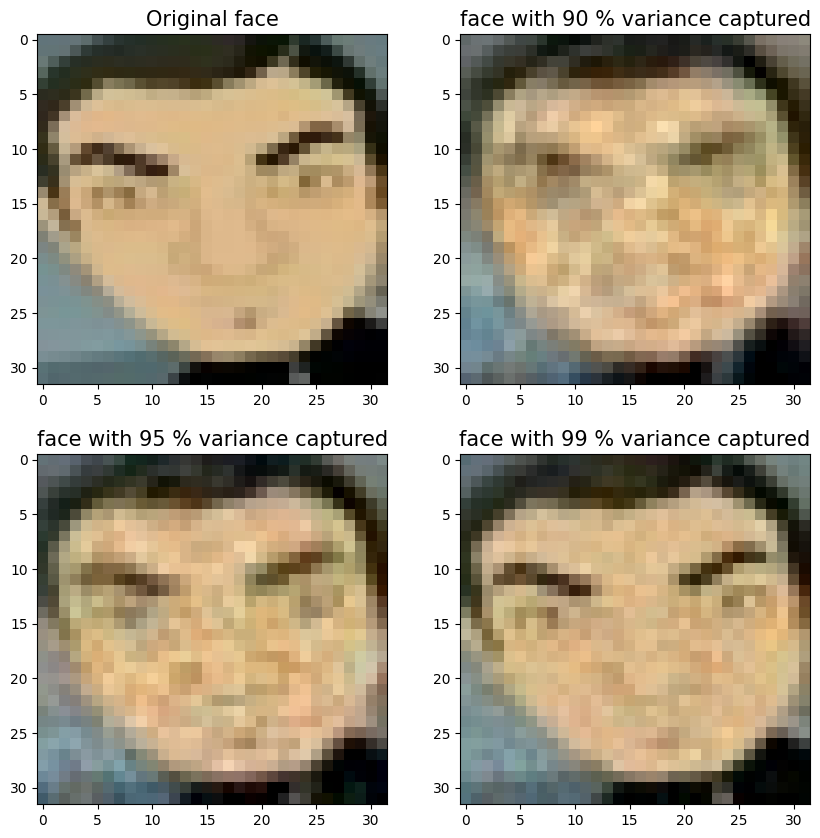

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


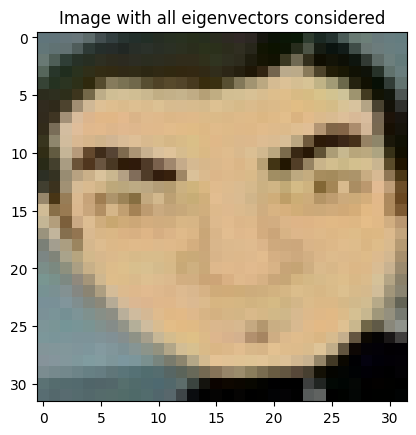

In [61]:
#consider some random face to be reconstructed
face = X[19]

img_set = []
img_set.append(face.reshape(H,W,C))
mean_face = X.mean(axis = 0)

print(face.reshape(H,W,C).shape)

    
#case1 : 90% variance
variance = 0.90
n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
print('num components required for {} variability: {}'.format(variance*100.0, n_components))
P = project(eigenvectors[0: n_components + 1, :], face.reshape (1 , -1) , mean_face)  #these are wts of considered eigenvectors for current face
R = reconstruct(eigenvectors[0: n_components + 1, :], P, mean_face)
# reshape and append to plots
R = R.reshape(X[0].shape )
img_set.append(R.reshape(H,W,C))

#case2 : 95% variance
variance = 0.95
n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
print('num components required for {} variability: {}'.format(variance*100.0, n_components))
P = project(eigenvectors[0: n_components + 1, :], face.reshape (1 , -1) , mean_face)  #these are wts of considered eigenvectors for current face
R = reconstruct(eigenvectors[0: n_components + 1, :], P, mean_face)
# reshape and append to plots
R = R.reshape(X[0].shape )
img_set.append(R.reshape(H,W,C))

#case3 : 99% variance
variance = 0.99
n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
print('num components required for {} variability: {}'.format(variance*100.0, n_components))
P = project(eigenvectors[0: n_components + 1, :], face.reshape (1 , -1) , mean_face)  #these are wts of considered eigenvectors for current face
R = reconstruct(eigenvectors[0: n_components + 1, :], P, mean_face)
# reshape and append to plots
R = R.reshape(X[0].shape )
img_set.append(R.reshape(H,W,C))

plot_images(img_set, 2, 2, ['Original face', 'face with 90 % variance captured', 'face with 95 % variance captured', 'face with 99 % variance captured'])

#case4 : lets consider all eigenvectors
P = project(eigenvectors[0: 672, :], face.reshape (1 , -1) , mean_face)  #these are wts of considered eigenvectors for current face
R = reconstruct(eigenvectors[0: 672, :], P, mean_face)
# reshape and append to plots
R = R.reshape(X[0].shape )
plt.imshow(R.reshape(H,W,C))
plt.title('Image with all eigenvectors considered')
plt.show()


## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [19]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

Dominant eigenfaces of class: Amitabhbachan


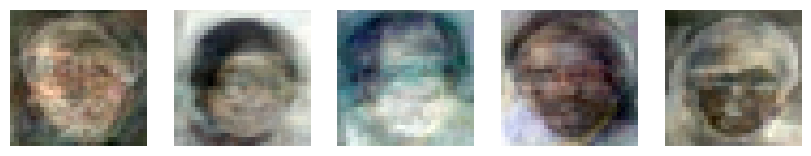

**********************************************************************************************
Dominant eigenfaces of class: AamirKhan


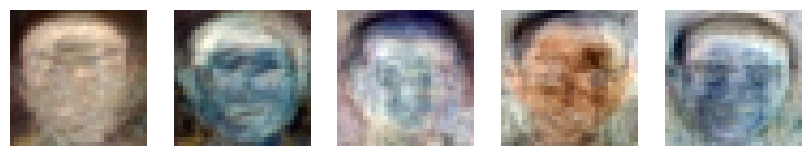

**********************************************************************************************
Dominant eigenfaces of class: DwayneJohnson


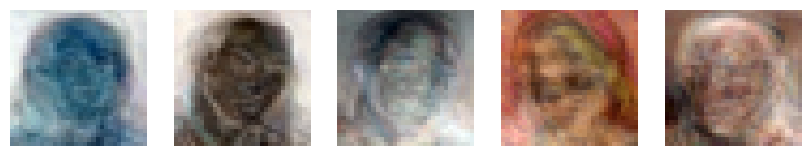

**********************************************************************************************
Dominant eigenfaces of class: AishwaryaRai


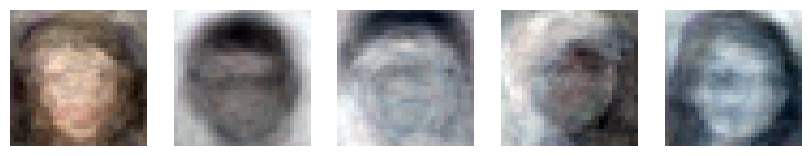

**********************************************************************************************
Dominant eigenfaces of class: BarackObama


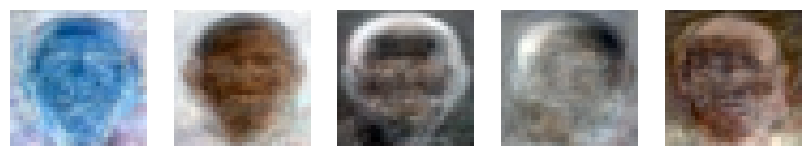

**********************************************************************************************
Dominant eigenfaces of class: NarendraModi


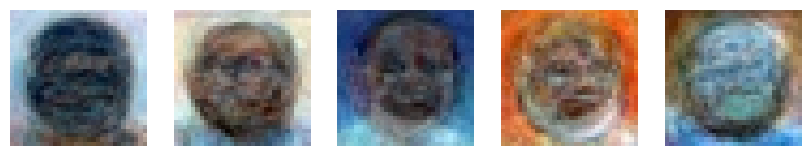

**********************************************************************************************
Dominant eigenfaces of class: ManmohanSingh


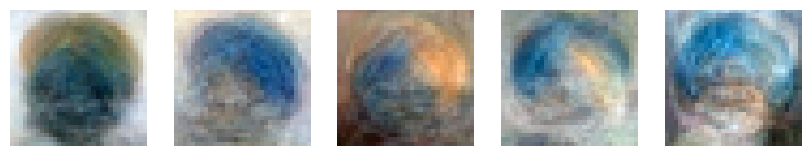

**********************************************************************************************
Dominant eigenfaces of class: VladimirPutin


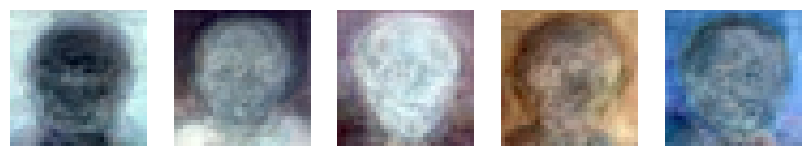

**********************************************************************************************


In [20]:
# visualize

# 'Amitabhbachan': 0,
# 'AamirKhan': 1,
# 'DwayneJohnson': 2,
# 'AishwaryaRai': 3,
# 'BarackObama': 4,
# 'NarendraModi': 5,
# 'ManmohanSingh': 6,
# 'VladimirPutin': 7

#fn provided to visualize eigenvectors of data matrix
def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()
    
#iterate thru all classes
n_classes = np.unique(y).shape[0]
i = 0
for k, v in cfw_dict.items():
    #step1: get data for this class alone
    indices = np.where(y == i)[0]
    X_class = X[indices, :]
    N,H,W = X_class.shape[0:3]
    C = 1 if opt['is_grayscale'] else X_class.shape[3]
    X_class = X_class.reshape((N, H * W * C)) 
    
    #step2: compute eigenvectors of data matrix of current class
    [eigenvalues, eigenvectors] = get_eigenvalues_and_eigenvectors(X_class, y)
    eigenvectors = eigenvectors.T
    
    #step3: visualize dominant 5 eigen faces of current class
    print('Dominant eigenfaces of class: {}'.format(k))
    plot(eigenvectors,H,W,C, range(5))
    print('**********************************************************************************************')
    i = i + 1

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [21]:
# components required
#iterate thru all classes
n_classes = np.unique(y).shape[0]
i = 0
variance = 0.90

X,y = load_data(dirpath)

for k, v in cfw_dict.items():
    print('class: {}'.format(k))
    #step1: get data for this class alone
    indices = np.where(y == i)[0]
    X_class = X[indices, :]
    N,H,W = X_class.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X_class = X_class.reshape((N, H * W * C)) 
    
    #step2: compute eigenvectors of data matrix of current class
    [eigenvalues, eigenvectors] = get_eigenvalues_and_eigenvectors(X_class, y)
    eigenvectors = eigenvectors.T
    
    #step3: Number of principal components required to retain 90% variance
    n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
    print('num components required for {} variability: {}'.format(variance*100.0, n_components))
    
    print('**********************************************************************************************')
    i = i + 1

#print n_components required for 90% variance of entire dataset
print('\n')
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N, H * W * C)) 
[eigenvalues, eigenvectors] = get_eigenvalues_and_eigenvectors(X, y)
eigenvectors = eigenvectors.T
n_components = get_no_of_eigenvectors_for_given_variance(eigenvalues, variance)
print('num components required for {} variability for entire dataset: {}'.format(variance*100.0, n_components))

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
class: Amitabhbachan
num components required for 90.0 variability: 20
**********************************************************************************************
class: AamirKhan
num components required for 90.0 variability: 23
**********************************************************************************************
class: DwayneJohnson
num components required for 90.0 variability: 27
**********************************************************************************************
class: AishwaryaRai
num components required for 90.0 variability: 35
**********************************************************************************************
class: BarackObama
num components required for 90.0 variability: 42
**********************************************************************************************
class: NarendraModi
num components required for 90.0 variability: 56
*************************************************************

#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

a.) No, the number of components are different for each of classes and different from entire dataset.  <br>
b.) Reason: When we consider dataset of single class, all images will have similar features, so we can explain large variability with less no of principal components only.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [22]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [23]:
# code here

In [24]:
# analysis / plot (split the cells if required)